# Rat LPS VAMPIRE Analysis

19 May 2022

Objetive: Perform VAMPIRE analysis on the rat LPS model.

## Baseline data setup

### Baseline VAMPIRE analysis

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import vampire as vp
from sklearn import manifold
vp.plot.set_plot_style()

In [3]:
img_set_path = r'C:\Files\github-projects/nance-lab-data/microfiber/0-raw-rat-lps-ostu'
output_path = r'C:\Files\github-projects\nance-lab-data\microfiber\result\result-2022-05-19-rat-lps'

In [5]:
# extract properties from all images for future use
vp.extraction.extract_properties(img_set_path)

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio
0,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,1,12.460606,687.230303,165,108.047727,27.401044,14.490758,0.848722,0.522152,0.404412,"[[2, 3, 4, 5, 6, 5, 7, 7, 8, 9, 10, 9, 10, 10,...",0.177608,1.890932
1,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,2,18.018470,1397.881266,379,101.633514,24.816875,20.931283,0.537240,0.825708,0.638047,"[[15, 14, 15, 16, 16, 17, 18, 19, 20, 20, 21, ...",0.461079,1.185636
2,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,3,19.225470,1042.060543,479,249.580736,85.345163,13.065085,0.988213,0.463698,0.208624,"[[76, 77, 79, 81, 80, 79, 77, 71, 70, 67, 66, ...",0.096633,6.532308
3,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,4,26.551724,124.913793,174,66.284271,22.029073,12.827129,0.812987,0.769912,0.487395,"[[11, 11, 12, 14, 14, 16, 16, 14, 13, 13, 9, 8...",0.497666,1.717382
4,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,5,28.321918,1477.808219,146,86.976659,31.979941,9.866010,0.951222,0.491582,0.289683,"[[2, 3, 4, 5, 6, 8, 8, 10, 11, 12, 11, 11, 12,...",0.242525,3.241426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,8,886.611429,32.811429,175,84.840620,27.762738,10.919180,0.919409,0.648148,0.388889,"[[19, 20, 22, 23, 24, 24, 23, 22, 19, 20, 21, ...",0.305520,2.542566
1056,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,9,951.806818,200.065341,352,211.237590,48.018585,33.740386,0.711533,0.382193,0.279365,"[[12, 13, 22, 23, 25, 26, 27, 27, 28, 28, 31, ...",0.099131,1.423178
1057,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,10,1090.952586,19.340517,232,106.533009,31.690446,12.397036,0.920309,0.664756,0.426471,"[[5, 5, 4, 4, 5, 4, 4, 5, 6, 6, 8, 7, 8, 7, 6,...",0.256880,2.556292
1058,2019-02-25_NT_serum_24h_60x_scan_3_otsu_thresh...,33,11,1306.688073,217.779817,218,162.331998,39.593625,36.349899,0.396408,0.296196,0.203169,"[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, ...",0.103958,1.089236


Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-raw-rat-lps-ostu
Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-raw-rat-lps-ostu


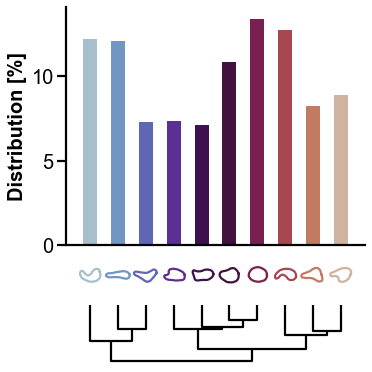

In [13]:
build_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'output_path': [output_path],
        'model_name': ['rat-lps'],
        'num_points': [np.nan],
        'num_clusters': [10],
        'num_pc': [np.nan],
    })
vp.quickstart.build_models(build_info_df, random_state=1)

In [7]:
model_path = os.path.join(output_path, 'model_rat-lps_(50_5_33)__.pickle')
vampire_model = vp.util.read_pickle(model_path)

Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-raw-rat-lps-ostu
Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\0-raw-rat-lps-ostu


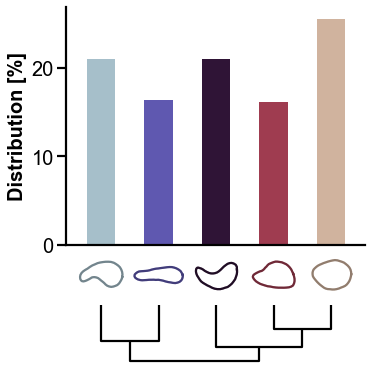

In [8]:
apply_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'model_path': [model_path],
        'output_path': [output_path],
        'img_set_name': ['rat-lps'],
    })
vp.quickstart.apply_models(apply_info_df)

In [9]:
property_path = os.path.join(output_path, 'apply-properties_rat-lps_on_rat-lps_(50_5_33)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)

### Data processing

#### Label experimental metadata

In [10]:
apply_properties_df.head()

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,distance_to_centroid
0,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,1,12.460606,687.230303,165,108.047727,27.401044,14.490758,0.848722,0.522152,0.404412,"[[2, 3, 4, 5, 6, 5, 7, 7, 8, 9, 10, 9, 10, 10,...",0.177608,1.890932,"[1.6353040771383043, 1.7163810106518922, 1.418...",0,0.780588
1,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,2,18.018470,1397.881266,379,101.633514,24.816875,20.931283,0.537240,0.825708,0.638047,"[[15, 14, 15, 16, 16, 17, 18, 19, 20, 20, 21, ...",0.461079,1.185636,"[0.9771924237789447, 1.1453045611748363, 1.189...",4,0.669492
2,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,3,19.225470,1042.060543,479,249.580736,85.345163,13.065085,0.988213,0.463698,0.208624,"[[76, 77, 79, 81, 80, 79, 77, 71, 70, 67, 66, ...",0.096633,6.532308,"[1.6789184548842866, 1.4543568406969112, 1.253...",1,0.550435
3,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,4,26.551724,124.913793,174,66.284271,22.029073,12.827129,0.812987,0.769912,0.487395,"[[11, 11, 12, 14, 14, 16, 16, 14, 13, 13, 9, 8...",0.497666,1.717382,"[1.2186203487269303, 1.3777362208352035, 1.350...",2,0.745616
4,2019-02-18_DAPI_Iba_LPS_100ng_0-24_24h_60x_sca...,0,5,28.321918,1477.808219,146,86.976659,31.979941,9.866010,0.951222,0.491582,0.289683,"[[2, 3, 4, 5, 6, 8, 8, 10, 11, 12, 11, 11, 12,...",0.242525,3.241426,"[1.6261754896860003, 1.6041735138097717, 1.440...",2,0.805937


In [11]:
def label_df(properties_df, id_df, target_props, search_prop='filename'):
    """
    properties_df : DataFrame
        Contains "filename" column
    id_df : DataFrame
        Contains columns listed in `properties` and "regex" column.
    target_props : list
        List of property(s) to be added. Must match column name in `id_df`.
    """
    properties_df = properties_df.copy()
    properties_df[target_props] = np.nan
    for i in range(id_df['regex'].size):
        mask = properties_df[search_prop].astype(str).str.contains(id_df['regex'][i])
        properties_df.loc[mask, target_props] = id_df.iloc[i, :][target_props].values
    return properties_df